In [3]:
import proplot as pplt
import meds
import numpy as np

In [2]:
fnames = [
    "DES2120-4706_r5747p06_%s_pizza-cutter-slices.fits.fz" % b
    for b in ["g", "r", "i", "z"]
]

mfiles = [
    meds.MEDS(fname)
    for fname in fnames
]

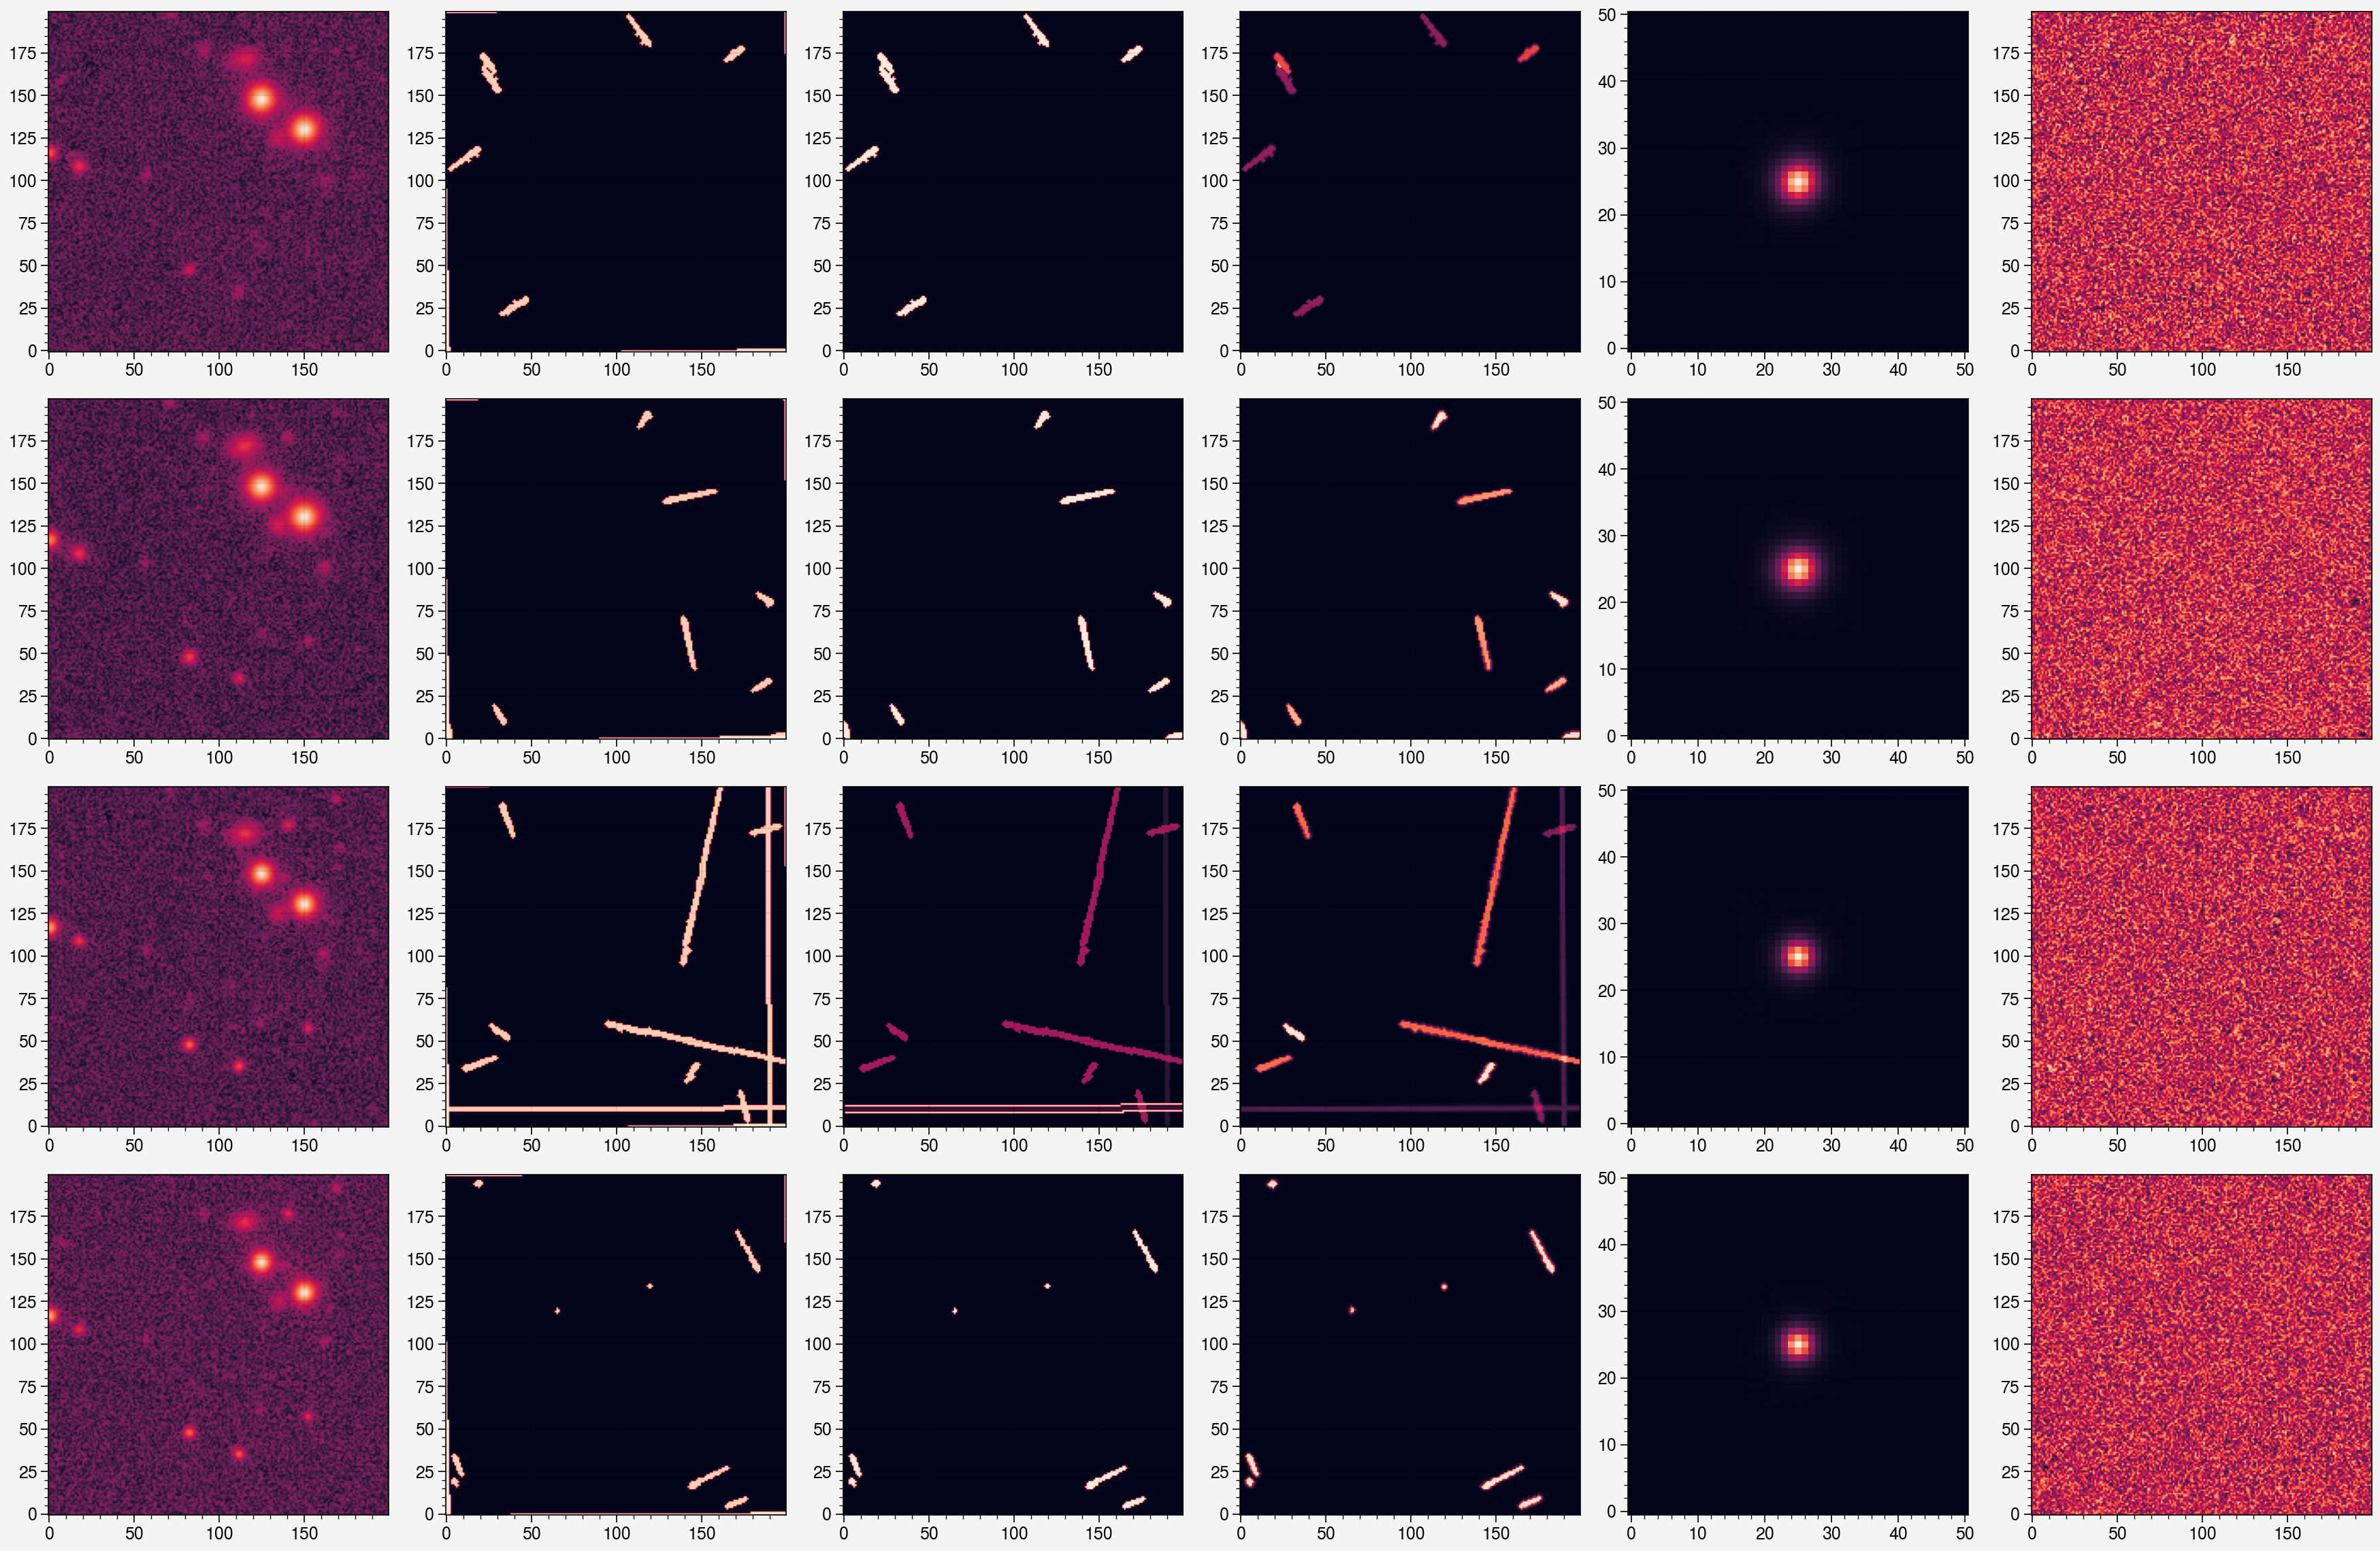

In [9]:
icut = 101

def _plot_meds(axs, m, b):
    img = m.get_cutout(icut, 0, type="image")
    wgt = m.get_cutout(icut, 0, type="weight")
    psf = m.get_cutout(icut, 0, type="psf")
    bmask = m.get_cutout(icut, 0, type="bmask")
    ormask = m.get_cutout(icut, 0, type="ormask")
    mfrac = m.get_cutout(icut, 0, type="mfrac")
    nse = m.get_cutout(icut, 0, type="noise")
    
    axs[0].imshow(
        np.arcsinh(img * np.sqrt(wgt)),
        origin="lower",
        cmap="rocket",
    )

    axs[1].imshow(
        np.arcsinh(bmask),
        origin="lower",
        cmap="rocket",
    )

    axs[2].imshow(
        np.arcsinh(ormask),
        origin="lower",
        cmap="rocket",
    )

    axs[3].imshow(
        mfrac,
        origin="lower",
        cmap="rocket",
    )

    axs[4].imshow(
        psf,
        origin="lower",
        cmap="rocket",
    )
    
    axs[5].imshow(
        np.arcsinh(nse * np.sqrt(wgt)),
        origin="lower",
        cmap="rocket",
    )

fig, axs = pplt.subplots(nrows=4, ncols=6, share=0)

for i, b in enumerate(["g", "r", "i", "z"]):
    _plot_meds(axs[i, :], mfiles[i], b)